In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wfdb
import glob
from wfdb import processing
import scipy
from scipy import *

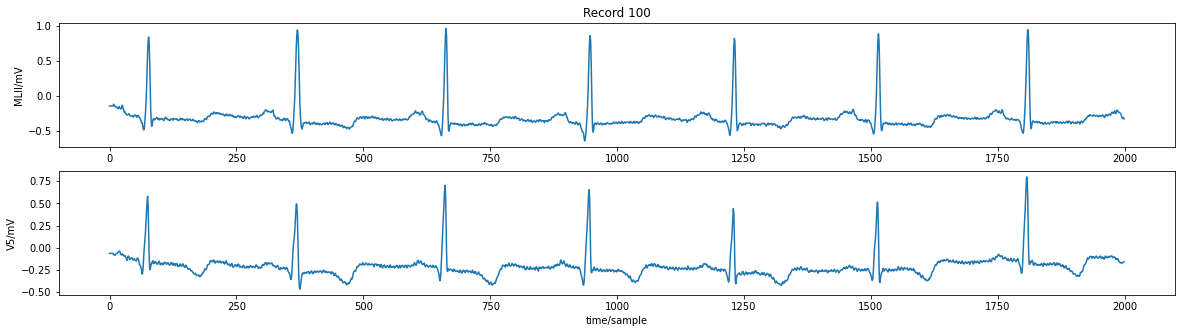

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.32 , -0.165],
        [-0.31 , -0.16 ],
        [-0.33 , -0.16 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [20374, 62756],
 'block_size': [0, 0]}

In [2]:
record = wfdb.rdrecord('./mit-bih-database/100', sampto=2000)
wfdb.plot_wfdb(record, title='Record 100',figsize=(20,5))
display(record.__dict__)

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


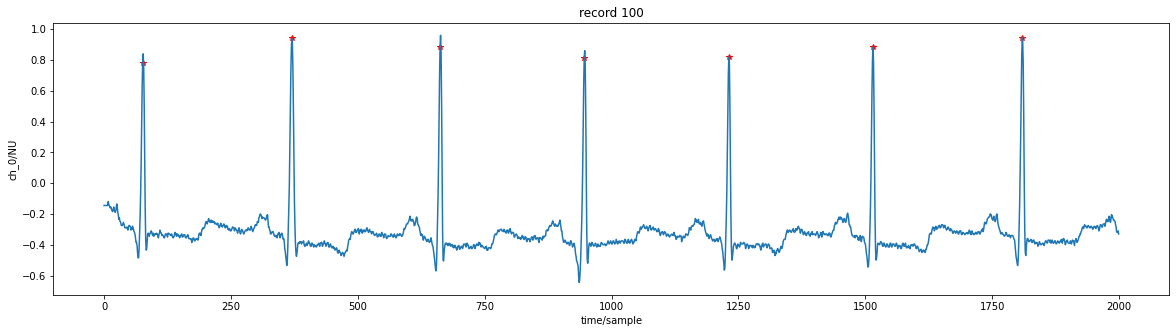

In [3]:
sig, fields = wfdb.rdsamp('./mit-bih-database/100', channels=[0], sampto=2000)
r100_peaks = processing.XQRS(sig=sig[:,0],fs=fields['fs'])
r100_peaks.detect()
wfdb.plot_items(signal=sig, ann_samp=[r100_peaks.qrs_inds],figsize=(20,5),title=('record 100'))

7 reference annotations, 7 test annotations

True Positives (matched samples): 7
False Positives (unmatched test samples): 0
False Negatives (unmatched reference samples): 0

Sensitivity: 1.0000 (7/7)
Positive Predictivity: 1.0000 (7/7)


c:\users\shour\appdata\local\programs\python\python38-32\lib\site-packages\wfdb\processing\evaluate.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


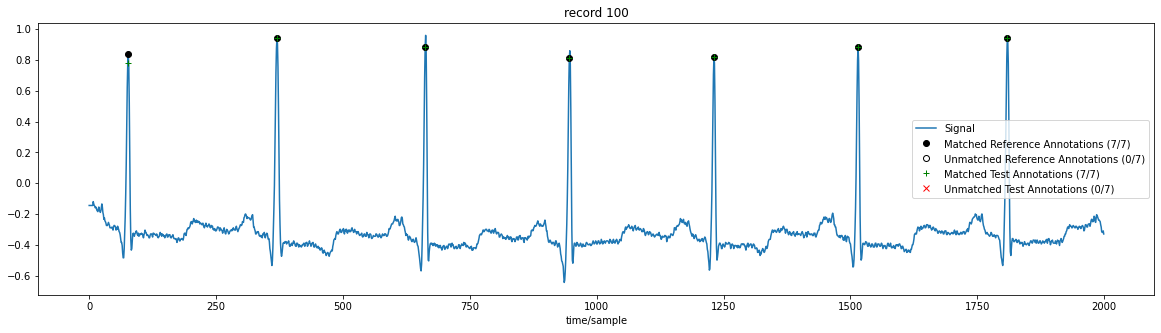

In [4]:
ann_ref = wfdb.rdann('./mit-bih-database/100','atr',sampto=2000)

comparitor = processing.Comparitor(ann_ref.sample[1:],r100_peaks.qrs_inds,int(fields['fs']),sig[:,0])
comparitor.compare()
comparitor.print_summary()
comparitor.plot(figsize=(20,5),title=('record 100'))

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


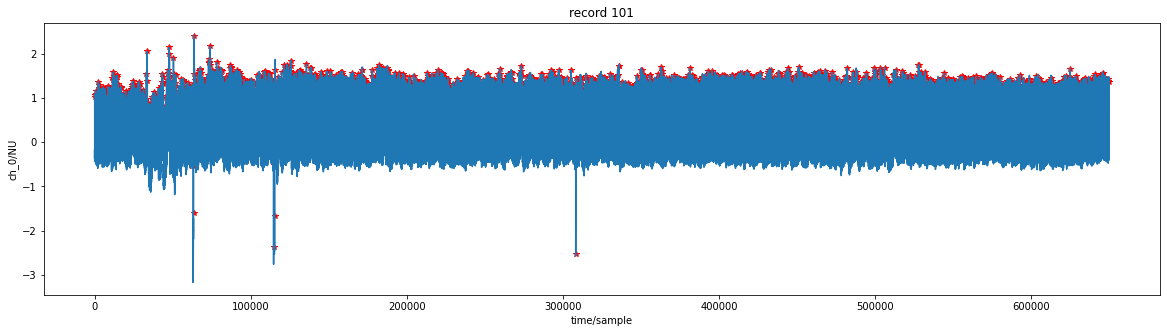

In [5]:
sig, fields = wfdb.rdsamp('./mit-bih-database/101', channels=[0])
r101_peaks = processing.XQRS(sig=sig[:,0],fs=fields['fs'])
r101_peaks.detect()
wfdb.plot_items(signal=sig, ann_samp=[r101_peaks.qrs_inds],figsize=(20,5),title=('record 101'))

1873 reference annotations, 1868 test annotations

True Positives (matched samples): 1868
False Positives (unmatched test samples): 0
False Negatives (unmatched reference samples): 5

Sensitivity: 0.9973 (1868/1873)
Positive Predictivity: 1.0000 (1868/1868)


c:\users\shour\appdata\local\programs\python\python38-32\lib\site-packages\wfdb\processing\evaluate.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


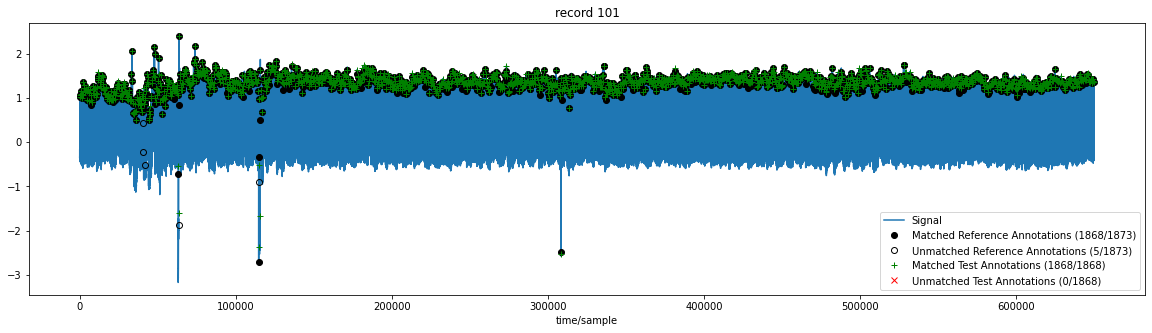

In [6]:
ann_ref = wfdb.rdann('./mit-bih-database/101','atr')
comparitor = processing.Comparitor(ann_ref.sample[1:],r101_peaks.qrs_inds,int(fields['fs']),
                                       sig[:,0])
comparitor.compare()
comparitor.print_summary()
comparitor.plot(figsize=(20,5),title=('record 101'))

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


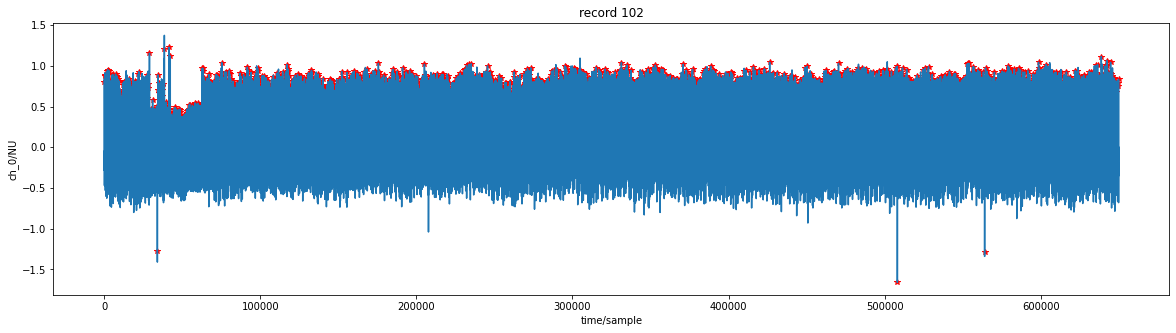

In [7]:
sig, fields = wfdb.rdsamp('./mit-bih-database/102', channels=[0])
r102_peaks = processing.XQRS(sig=sig[:,0],fs=fields['fs'])
r102_peaks.detect()
wfdb.plot_items(signal=sig, ann_samp=[r102_peaks.qrs_inds],figsize=(20,5),title=('record 102'))

2191 reference annotations, 2187 test annotations

True Positives (matched samples): 2187
False Positives (unmatched test samples): 0
False Negatives (unmatched reference samples): 4

Sensitivity: 0.9982 (2187/2191)
Positive Predictivity: 1.0000 (2187/2187)


c:\users\shour\appdata\local\programs\python\python38-32\lib\site-packages\wfdb\processing\evaluate.py:363: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


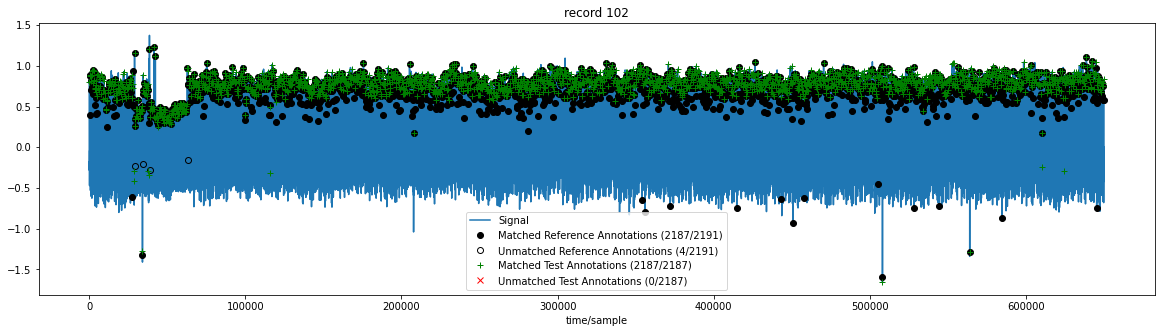

In [8]:
ann_ref = wfdb.rdann('./mit-bih-database/102','atr')
comparitor = processing.Comparitor(ann_ref.sample[1:],r102_peaks.qrs_inds,int(fields['fs']),
                                       sig[:,0])
comparitor.compare()
comparitor.print_summary()
comparitor.plot(figsize=(20,5),title=('record 102'))

In [12]:
data_files = glob.glob('./mit-bih-database/*.atr')
data_files = [i[:-4] for i in data_files]
data_files.sort()
print(data_files)

for e in data_files:
    sig, fields = wfdb.rdsamp(e, channels = [0]) 
    ann = wfdb.rdann(e, 'atr')
    good = ['N']
    ids = np.in1d(ann.symbol, good)
    imp_beats = ann.sample[ids]
    beats = (ann.sample)

peaks = processing.XQRS(sig=sig[:,0],fs=fields['fs'])
peaks.detect()
wfdb.plot_items(signal=sig, ann_samp=[r102_peaks.qrs_inds],figsize=(20,5),title=('record 102'))

['./mit-bih-database\\100', './mit-bih-database\\101', './mit-bih-database\\102', './mit-bih-database\\103', './mit-bih-database\\104', './mit-bih-database\\105', './mit-bih-database\\106', './mit-bih-database\\107', './mit-bih-database\\108', './mit-bih-database\\109', './mit-bih-database\\111', './mit-bih-database\\112', './mit-bih-database\\113', './mit-bih-database\\114', './mit-bih-database\\115', './mit-bih-database\\116', './mit-bih-database\\117', './mit-bih-database\\118', './mit-bih-database\\119', './mit-bih-database\\121', './mit-bih-database\\122', './mit-bih-database\\123', './mit-bih-database\\124', './mit-bih-database\\200', './mit-bih-database\\201', './mit-bih-database\\202', './mit-bih-database\\203', './mit-bih-database\\205', './mit-bih-database\\207', './mit-bih-database\\208', './mit-bih-database\\209', './mit-bih-database\\210', './mit-bih-database\\212', './mit-bih-database\\213', './mit-bih-database\\214', './mit-bih-database\\215', './mit-bih-database\\217', 